### Import libraries and create DataFrame from csv 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read, preprocess, and aggregate full season data
def read_data():
    # Read the full season data
    data = pd.read_excel("TE_Data.xlsx")

    # Preprocess full season data, drop irrelevant columns and convert data types
    data.drop(['FL', 'ROST'], axis=1, inplace=True)
    convert = data.select_dtypes('object').columns.difference(['Player'])
    data[convert] = data[convert].apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce')).fillna(0)
    data['Rank'] = data['Rank'].astype('Int64')

    return data

# Load the full season data
df = read_data()

# Recalculate 'Rank' based on 'FPTS' in descending order
df['Rank'] = df['FPTS'].rank(ascending=False, method='min').astype('int')

# Sort the DataFrame by 'Rank'
df = df.sort_values(by='Rank')

df.head(20)

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,G,FPTS,FPTS/G
0,1,Sam LaPorta (DET),86,120,889,10.3,48,8,10,1,4,0,17,239.3,14.1
1,2,Evan Engram (JAC),114,143,963,8.4,34,9,4,0,0,0,17,230.3,13.5
2,3,Travis Kelce (KC),93,121,984,10.6,53,12,5,0,0,0,15,219.4,14.6
3,4,T.J. Hockenson (MIN),95,127,960,10.1,29,13,5,0,0,0,15,219.0,14.6
4,5,George Kittle (SF),65,90,1020,15.7,66,18,6,1,2,0,16,203.2,12.7
5,6,David Njoku (CLE),81,123,882,10.9,43,12,6,0,0,0,16,201.2,12.6
6,7,Trey McBride (ARI),81,106,825,10.2,38,9,3,0,0,0,17,181.5,10.7
7,8,Cole Kmet (CHI),73,90,719,9.8,53,9,6,3,2,0,17,181.1,10.7
8,9,Jake Ferguson (DAL),71,102,761,10.7,40,8,5,0,0,0,17,177.1,10.4
9,10,Dalton Schultz (HOU),59,88,635,10.8,31,7,5,0,0,0,15,150.5,10.0


### Convert relevant stats to a per-game basis and create the final stats for analysis

In [2]:
# Define columns for per-game calculation
per_game = list(df.columns[2:])

# Define columns to exclude from the per-game calculation
exclude_per_game = ['Y/R', 'LG', 'G', 'FPTS', 'FPTS/G']

# Create columns and convert stats to a per-game basis for the defined columns, not those in the exclude list
for col in per_game:
    if col not in exclude_per_game:
        df[col + '/game'] = (df[col] / df['G']).round(1)

# Define final columns to be used for analysis, combines excluded and new per-game columns
final_columns = exclude_per_game + [col + '/game' for col in per_game if col not in exclude_per_game]

# Display final columns with 'Rank' and 'Player'
df[['Rank', 'Player'] + final_columns].head(10)

,Rank,Player,Y/R,LG,G,FPTS,FPTS/G,REC/game,TGT/game,YDS/game,20+/game,TD/game,ATT/game,YDS.1/game,TD.1/game
0,1,Sam LaPorta (DET),10.3,48,17,239.3,14.1,5.1,7.1,52.3,0.5,0.6,0.1,0.2,0.0
1,2,Evan Engram (JAC),8.4,34,17,230.3,13.5,6.7,8.4,56.6,0.5,0.2,0.0,0.0,0.0
2,3,Travis Kelce (KC),10.6,53,15,219.4,14.6,6.2,8.1,65.6,0.8,0.3,0.0,0.0,0.0
3,4,T.J. Hockenson (MIN),10.1,29,15,219.0,14.6,6.3,8.5,64.0,0.9,0.3,0.0,0.0,0.0
4,5,George Kittle (SF),15.7,66,16,203.2,12.7,4.1,5.6,63.8,1.1,0.4,0.1,0.1,0.0
5,6,David Njoku (CLE),10.9,43,16,201.2,12.6,5.1,7.7,55.1,0.8,0.4,0.0,0.0,0.0
6,7,Trey McBride (ARI),10.2,38,17,181.5,10.7,4.8,6.2,48.5,0.5,0.2,0.0,0.0,0.0
7,8,Cole Kmet (CHI),9.8,53,17,181.1,10.7,4.3,5.3,42.3,0.5,0.4,0.2,0.1,0.0
8,9,Jake Ferguson (DAL),10.7,40,17,177.1,10.4,4.2,6.0,44.8,0.5,0.3,0.0,0.0,0.0
9,10,Dalton Schultz (HOU),10.8,31,15,150.5,10.0,3.9,5.9,42.3,0.5,0.3,0.0,0.0,0.0


### Calculate the correlations for the final stats across different conditions

In [3]:
# Define columns and columns to exclude for correlation calculation, from final columns
exclude_corr = ['FPTS/G', 'FPTS', 'G']
corr_columns = [col for col in final_columns if col not in exclude_corr]

# Define a function to calculate correlations
def compute_correlations(dataframe, corr_columns):
    return dataframe[corr_columns].corrwith(dataframe['FPTS/G'])

# Compute correlations for various conditions
corr_all = compute_correlations(df, corr_columns)
corr_nonzero = compute_correlations(df[df['FPTS/G'] > 0], corr_columns)
corr_top50 = compute_correlations(df[df['Rank'] <= 50], corr_columns)
corr_top25 = compute_correlations(df[df['Rank'] <= 25], corr_columns)

# Compile all correlations into a DataFrame for comparison
df_corr = pd.DataFrame({
    'All Players': corr_all,
    'FPTS > 0': corr_nonzero,
    'Top 50 Players': corr_top50,
    'Top 25 Players': corr_top25
})

# Calculate the average correlation across the four conditions, adding 'Average' column to DataFrame
df_corr['Correlation'] = df_corr.mean(axis=1)

# Display the correlation DataFrame
df_corr.round(2)

,All Players,FPTS > 0,Top 50 Players,Top 25 Players,Correlation
Y/R,0.60,0.18,0.12,0.08,0.25
LG,0.79,0.64,0.44,0.18,0.51
REC/game,0.98,0.98,0.94,0.86,0.94
TGT/game,0.98,0.97,0.93,0.84,0.93
YDS/game,0.98,0.98,0.96,0.90,0.95
20+/game,0.83,0.80,0.78,0.70,0.78
TD/game,0.81,0.78,0.68,0.61,0.72
ATT/game,0.17,0.15,0.09,-0.08,0.08
YDS.1/game,0.14,0.13,0.08,-0.08,0.07
TD.1/game,0.12,0.10,0.07,-0.07,0.05


### Assign the weights for the final stats

In [4]:
# Calculate R^2 for the 'Average' correlation, adding 'R^2' column to DataFrame
df_corr['R^2'] = df_corr['Correlation'] ** 2

# Define the specific stats for which you want to assign weights
specific_stats = ['REC/game',
                'TGT/game',
                'YDS/game',
                '20+/game',
                'TD/game']

# Define the calculation to assign weights
def weight_calc(row, specific_stats):
    if row.name in specific_stats:
        return 1 + row['R^2']  # Assign weight based on R^2 for specific stats
    else:
        return 1  # Default weight for other stats
    
# Assign weights based on the given criteria, adding 'Weight' column to DataFrame
df_corr['Weight'] = df_corr.apply(weight_calc, specific_stats=specific_stats, axis=1)

# Display the new columns in the DataFrame
df_corr[['Correlation', 'R^2', 'Weight']].round(2)

,Correlation,R^2,Weight
Y/R,0.25,0.06,1.00
LG,0.51,0.26,1.00
REC/game,0.94,0.89,1.89
TGT/game,0.93,0.86,1.86
YDS/game,0.95,0.91,1.91
20+/game,0.78,0.61,1.61
TD/game,0.72,0.52,1.52
ATT/game,0.08,0.01,1.00
YDS.1/game,0.07,0.00,1.00
TD.1/game,0.05,0.00,1.00


### Multiply the assigned weights to the final stats

In [5]:
# Multiply each relevant column by its corresponding weight
for col in corr_columns:
    weight = df_corr.loc[col, 'Weight']
    df[col + '_weighted'] = (df[col] * weight).round(1)

# Extract the weighted columns
weight_columns = [col + '_weighted' for col in corr_columns]

# Display the new weighted stats columns
df_weight = df[['Rank', 'Player', 'FPTS/G'] + weight_columns]
df_weight.sort_values(by=['FPTS/G'],ascending=False).head(10)

,Rank,Player,FPTS/G,Y/R_weighted,LG_weighted,REC/game_weighted,TGT/game_weighted,YDS/game_weighted,20+/game_weighted,TD/game_weighted,ATT/game_weighted,YDS.1/game_weighted,TD.1/game_weighted
2,3,Travis Kelce (KC),14.6,10.6,53.0,11.7,15.1,125.3,1.3,0.5,0.0,0.0,0.0
3,4,T.J. Hockenson (MIN),14.6,10.1,29.0,11.9,15.8,122.2,1.4,0.5,0.0,0.0,0.0
0,1,Sam LaPorta (DET),14.1,10.3,48.0,9.6,13.2,99.9,0.8,0.9,0.1,0.2,0.0
1,2,Evan Engram (JAC),13.5,8.4,34.0,12.6,15.7,108.1,0.8,0.3,0.0,0.0,0.0
14,15,Mark Andrews (BAL),13.5,12.1,38.0,8.5,11.4,103.9,1.3,0.9,0.1,0.0,0.0
4,5,George Kittle (SF),12.7,15.7,66.0,7.7,10.4,121.8,1.8,0.6,0.1,0.1,0.0
5,6,David Njoku (CLE),12.6,10.9,43.0,9.6,14.4,105.2,1.3,0.6,0.0,0.0,0.0
7,8,Cole Kmet (CHI),10.7,9.8,53.0,8.1,9.9,80.8,0.8,0.6,0.2,0.1,0.0
6,7,Trey McBride (ARI),10.7,10.2,38.0,9.1,11.6,92.6,0.8,0.3,0.0,0.0,0.0
8,9,Jake Ferguson (DAL),10.4,10.7,40.0,7.9,11.2,85.6,0.8,0.5,0.0,0.0,0.0


### Calculate each player's average weighted score and rank them from high to low

In [6]:
# Define select columns to be used for the average weighted score
avg = ['REC/game_weighted',
 'TGT/game_weighted',
 'YDS/game_weighted',
 '20+/game_weighted',
 'TD/game_weighted',
 'FPTS/G']

# Calculate the average weighted score for the select columns
df['Score'] = df[avg].mean(axis=1).round(1)

# Rank both of the average weighted scores with NaN handling
df['Final Rank'] = df.sort_values('Score', ascending=False)\
                ['Score'].rank(method='first', ascending=False, na_option='bottom').astype(int)

# Calculate the variance in ranking both ranks
df['Variance'] = df['Rank'] - df['Final Rank']

### Display results of the average weighted score and rank

In [7]:
# List of columns to be excluded
final_columns_exclude = ['Y/R', 'LG', 'ATT/game', 'YDS.1/game', 'TD.1/game']

# Exclude the specified columns from final_columns
final_columns = [col for col in final_columns if col not in final_columns_exclude]

# Create final analysis columns
analysis = df[['Rank', 'Final Rank', 'Player', 'Score', 'Variance'] + final_columns]
analysis.set_index('Rank', inplace=True)
analysis = analysis.sort_values(by='Final Rank', ascending=True)

# Export to Excel
analysis.to_excel("TE_Analysis.xlsx", index=False)

# Display the top 30 rows
analysis.head(30)


,Final Rank,Player,Score,Variance,G,FPTS,FPTS/G,REC/game,TGT/game,YDS/game,20+/game,TD/game
Rank,,,,,,,,,,,,
3,1,Travis Kelce (KC),28.1,2,15,219.4,14.6,6.2,8.1,65.6,0.8,0.3
4,2,T.J. Hockenson (MIN),27.7,2,15,219.0,14.6,6.3,8.5,64.0,0.9,0.3
5,3,George Kittle (SF),25.8,2,16,203.2,12.7,4.1,5.6,63.8,1.1,0.4
2,4,Evan Engram (JAC),25.2,-2,17,230.3,13.5,6.7,8.4,56.6,0.5,0.2
6,5,David Njoku (CLE),24.0,1,16,201.2,12.6,5.1,7.7,55.1,0.8,0.4
15,6,Mark Andrews (BAL),23.2,9,10,135.4,13.5,4.5,6.1,54.4,0.8,0.6
1,7,Sam LaPorta (DET),23.1,-6,17,239.3,14.1,5.1,7.1,52.3,0.5,0.6
7,8,Trey McBride (ARI),20.8,-1,17,181.5,10.7,4.8,6.2,48.5,0.5,0.2
22,9,Darren Waller (FA),19.7,13,12,113.2,9.4,4.3,6.2,46.0,0.7,0.1


### Compare per-game stats of two players and visualize the results

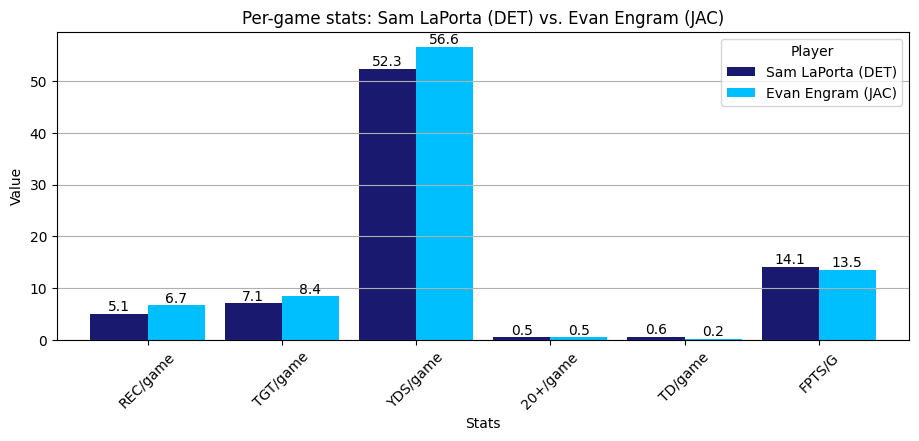

,Final Rank,G,FPTS,FPTS/G,REC/game,TGT/game,YDS/game,20+/game,TD/game
Player,,,,,,,,,
Sam LaPorta (DET),7,17,239.3,14.1,5.1,7.1,52.3,0.5,0.6
Evan Engram (JAC),4,17,230.3,13.5,6.7,8.4,56.6,0.5,0.2


In [8]:
# Prompt the user to input the name of the players
player1 = input("Enter player 1 name")
player2 = input("Enter player 2 name")

# Extract and reorder rows for the two specified players
# Filter rows where the 'Player' column contains the names entered by the user
players = df[df['Player'].str.contains(player1) | df['Player'].str.contains(player2)]
players.set_index('Player', inplace=True)
player1_match = players.index[0] if player1 in players.index[0] else players.index[1]
player2_match = players.index[1] if player2 in players.index[1] else players.index[0]
players = players.reindex([player1_match, player2_match])

# Define columns to be compared
compare_columns = [col.replace('_weighted', '') for col in avg]

# Define a function to compare per-game stats of two players
def compare(player1, player2):

    # Plot the data
    chart = players[compare_columns].T.plot(kind='bar',
                                            color=['midnightblue', 'deepskyblue'],
                                            width=0.85,
                                            figsize=(11,4))

    # Format chart
    plt.title(f'Per-game stats: {player1} vs. {player2}')
    plt.xlabel('Stats')
    plt.ylabel('Value')
    plt.grid(axis='y')
    plt.xticks(rotation=45)

    # Add data labels above the bars
    for p in chart.patches:
        chart.annotate(f'{p.get_height():.1f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 5), 
                    textcoords = 'offset points')

    plt.show()

# Call the 'compare' function which creates and displays the visualization
compare(player1_match, player2_match)
players[['Final Rank'] + final_columns]